Finite Elements

Alexandra Hurst

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.linalg as la

# Problem 1

In [2]:
def prob1(f, a, b, alpha, beta, e, N, even=1):
    t=np.linspace(a,b,N+1)**even
    h=t[1:]-t[:-1]
    h=np.insert(h,0,1)
    phi=np.array([alpha]+list(-.5*(h[1:-1]+h[2:]))+[beta]).T
    A=np.zeros((N+1,N+1))
    A[0,0]=1
    for i in range(1,N):
        for j in range(i-1,i+2):
            if i==j+1:
                A[i,j]=e/h[j+1]+.5
            elif j==i:
                A[i,j]=-e/h[j]-e/h[j+1]
            elif i==j-1:
                A[i,j]=e/h[j]-.5
            else:
                A[i,j]=0
    A[-1,-1]=1
    ab=np.zeros((3,len(A)))
    ab[0]=np.array([0]+list(np.diagonal(A,1)))
    ab[1]=np.diagonal(A)
    ab[2]=np.array(list(np.diagonal(A,-1))+[0])
    #print(ab)
    K=la.solve_banded((1,1),ab,phi)
    return K

In [3]:
alpha=2
beta=4
a=0
b=1
e=.02
N=100
f = lambda x: -1
K=prob1(f,a,b,alpha,beta,e,N)

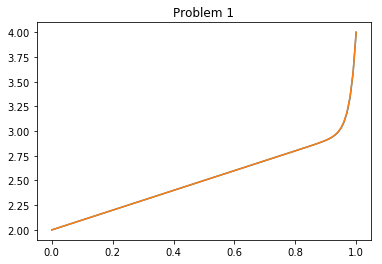

In [4]:
t=np.linspace(a,b,N+1)
plt.plot(t,K)
plt.plot(t,alpha+t+(beta-alpha-1)*((np.e**(t/e)-1)/(np.e**(1/e)-1)))
plt.title("Problem 1")
plt.show()

# Problem 2

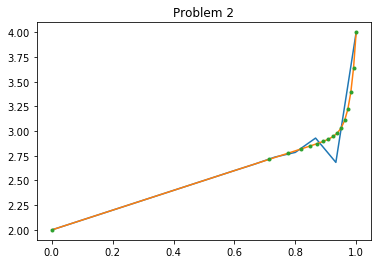

In [5]:
N=15
t=np.linspace(a,b,N+1)
K=prob1(f,a,b,alpha,beta,e,N, even=1/8)
L=prob1(f,a,b,alpha,beta,e,N)
plt.plot(t,L)
t=t**(1/8)
plt.plot(t,K)
plt.plot(t,alpha+t+(beta-alpha-1)*((np.e**(t/e)-1)/(np.e**(1/e)-1)),'.')
plt.title("Problem 2")
plt.show()

# Problem 3

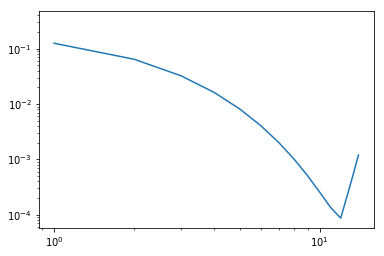

In [7]:
err=[]

for i in range(4,19):
    #print(i)
    K=prob1(f,a,b,alpha,beta,e,2**i)
    t=np.linspace(a,b,2**i+1)
    sol = alpha+t+(beta-alpha-1)*((np.e**(t/e)-1)/(np.e**(1/e)-1))
    err.append(sum(abs(K-sol)))
plt.loglog(err)
plt.show()